In [0]:
#Importing basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing the dataset using Google Drive Link

data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/P16-Self-Organizing-Maps/Self_Organizing_Maps/Credit_Card_Applications.csv")
data.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


The Dataset contains information contained in the credit card application forms of the customers for the sake of confidentiality the variables are named from A1 to A14 and the Class variable is indicating whether the application is approved or not.

In [0]:
#Storing the feature values in the variable 'X' except Class Feature
X= data.iloc[:,:-1].values

#Storing the class feature values in the variable 'y'
y = data.iloc[:,-1].values

### Feature Scaling : 

As features like A2,A3,A13 & A14 are continuous in nature and having higher values as compared to the other features so we would scale them using the MinMaxScaler function to remove the bias.


In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))

In [0]:
X_scaled = sc.fit_transform(X)

Training the Self Organizing Maps using the given features to map the multidimensional input feature to a 2-D Map

In [7]:
#importing the MiniSom Class from minisom package, use !pip install minisom if you don't have it pre installed
# !pip install minisom

from minisom import MiniSom

  Created wheel for minisom: filename=MiniSom-2.2.3-cp36-none-any.whl size=7550 sha256=e39527198b1458fb96a0ce85a7df9006f50d67f53ec95535ff41dbf503a44915
  Stored in directory: /root/.cache/pip/wheels/35/62/79/4d921062c847ee15a3bb3ac2ea984ed401c8b6b2944f08f697
Successfully built minisom


In [0]:
#Storing the class Minisom into an object som

som = MiniSom(10,10,input_len=15,sigma=1.0,learning_rate=0.1) 
#we have given the dimension of map as 10x10, the coverage radius as 1.0, input_len i.e. features as 15 & learning_rate as 0.1

In [0]:
#initializing the weights for all the inputs randomly using random_weights_init method of som funciton

som.random_weights_init(X_scaled)

In [10]:
#Now train the maps based on input features

som.train_random(X_scaled,num_iteration=100,verbose=True)

 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.021001147489590047
 topographic error: 0.8608695652173913


### Visualizing the Results

In [0]:
from pylab import bone,pcolor,colorbar,show,plot

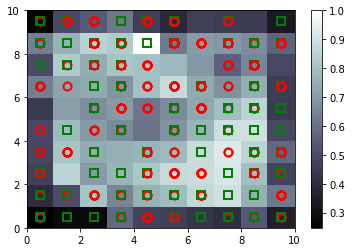

In [17]:
#Mapping of Mean Inter-Neuron Distances on a 10x10 SOM

bone()                                                          #initialize a map area of 10x10
pcolor(som.distance_map().T)                                    #use distance_map method to map the MID on to the initialized map
colorbar()                                                      # using colorbar to specify the value range of MIDs based on grid color

''' Now it can be seen that white grid color indicates the largest MID and it is nothing but an outlier and that is what we were
    looking to filter out the applications that behave like an outlier. So White grid color applications are prone to be fraud customers.
    To check whether the approval of applications are right or not I'll use markers to mark whether the application is approved or rejected'''

markers = ['o','s']                                             #circle and square markers
colors = ['r','g']                                              #red color for circles and green color for square markers

for i,x in enumerate(X_scaled):
  w = som.winner(x)                       #the som.winner function provides the winning node or BMU(Best matching unit) i.e. the node which has least MID
  plot(w[0]+0.5, w[1]+0.5,                #plot the winning node on the map by giving them as a co-ordinate and add 0.5 to plot them in middle of the grid
       markers[y[i]],                     #now check for the class feature (card approved or not) and place the markers accordingly
       markeredgecolor = colors[y[i]],    #assign edge color as per the class feature i.e. red for class 0 and green for class 1
       markerfacecolor = "None",
       markersize = 8,
       markeredgewidth = 2)
show()

It can be seen from the map that the white grid entry at 5x9 coordinates have marker as green square that is the loan has been approved for these customers but they are highly prone to be fraud customers.

Let's catch the bad guys the fraud applications

In [18]:
mappings = som.win_map(X_scaled)
mappings

defaultdict(list,
            {(0,
              0): [array([0.92539913, 1.        , 0.41849624, 0.0625    , 0.5       ,
                     0.23076923, 0.375     , 0.00736842, 1.        , 0.        ,
                     0.        , 0.        , 0.5       , 0.08      , 0.        ]), array([6.62526178e-01, 1.00000000e+00, 4.08571429e-01, 2.98214286e-02,
                     5.00000000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
                     1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
                     5.00000000e-01, 6.50000000e-02, 1.00000000e-05]), array([0.65694012, 1.        , 0.44240602, 0.08035714, 0.5       ,
                     0.15384615, 0.5       , 0.02631579, 1.        , 0.        ,
                     0.        , 0.        , 0.5       , 0.28      , 0.        ]), array([0.11379936, 1.        , 0.52      , 0.42857143, 0.5       ,
                     0.46153846, 0.375     , 0.56140351, 1.        , 0.        ,
                     0. 

It can be seen that the mapping variable returns a dictionary which has the arrays of inputs corresponding to each co-ordinate of the SOM, plotted above.

In [0]:
frauds = mappings[(5,9)] 

In [23]:
print("No. of fraud applications : ", len(frauds) )

No. of fraud applications :  31
ERROR! Session/line number was not unique in database. History logging moved to new session 59


In [24]:
frauds

[array([8.08936888e-01, 1.00000000e+00, 9.39849624e-02, 4.46428571e-02,
        0.00000000e+00, 2.30769231e-01, 3.75000000e-01, 4.38596491e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e-01, 7.00000000e-02, 4.00000000e-05]),
 array([0.68839822, 1.        , 0.03639098, 0.00142857, 0.5       ,
        0.53846154, 0.375     , 0.00140351, 0.        , 0.        ,
        0.        , 0.        , 0.5       , 0.        , 0.        ]),
 array([0.57560395, 1.        , 0.2356391 , 0.04464286, 0.5       ,
        0.61538462, 0.375     , 0.06140351, 0.        , 0.        ,
        0.        , 0.        , 0.5       , 0.1       , 0.        ]),
 array([7.46509216e-01, 1.00000000e+00, 3.42105263e-01, 1.51785714e-01,
        5.00000000e-01, 7.69230769e-01, 3.75000000e-01, 1.22807018e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e-01, 2.27000000e-01, 5.00000000e-04]),
 array([0.80564132, 1.        , 0.241804

Note: if more than one grids are white and got the green square marker we need to concatenate them into the fraud list using np.concatenate function

Now to identify the customers by their customer ids we need to inverse transform the arrays using minmaxscaler object sc

In [27]:
#frauds = sc.inverse_transform(frauds)
frauds_df = pd.DataFrame(data = frauds,columns=data.columns[:-1])
frauds_df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
0,15767729.0,1.0,20.00,1.25,1.0,4.0,4.0,0.125,0.0,0.0,0.0,0.0,2.0,140.0,5.0
1,15737627.0,1.0,16.17,0.04,2.0,8.0,4.0,0.040,0.0,0.0,0.0,0.0,2.0,0.0,1.0
2,15709459.0,1.0,29.42,1.25,2.0,9.0,4.0,1.750,0.0,0.0,0.0,0.0,2.0,200.0,1.0
3,15752139.0,1.0,36.50,4.25,2.0,11.0,4.0,3.500,0.0,0.0,0.0,0.0,2.0,454.0,51.0
4,15766906.0,1.0,29.83,3.50,2.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,216.0,1.0


The first entry in the transformed array is the customer Ids, thus we can identify the fraud customers based on the customer IDs